# Project was peer-reviewed and validated by a Data Scientist. 

# Training data is available in the repository. 
### Business objective of the project is to predict Device Failure.
# Project objective is to use ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning) to balance imbalanced data and compare findings of Random Under-sampling, Random Over-sampling, SMOTE (Synthetic Minority Over-sampling Technique), and ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning).

## [Random Under-sampling](https://github.com/mohammadbutt/5th-Project-Predicting-Device-Failure/blob/master/Predicting%20Device%20Failure-Random%20Under%20Sampling.ipynb)
## [Random Over-sampling](https://github.com/mohammadbutt/5th-Project-Predicting-Device-Failure/blob/master/Predicting%20Device%20Failure-Random%20Over%20Sampling.ipynb)
## [SMOTE (Synthetic Minority Over-sampling Technique)](https://github.com/mohammadbutt/5th-Project-Predicting-Device-Failure/blob/master/Predicting%20Device%20Failure-SMOTE.ipynb)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Training dataset is imported that contains the information that will be analyzed for the project.

In [2]:
data = pd.read_csv('failures.csv')

In [3]:
data.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


# 2. Checking missing values 

In [4]:
data.isnull().sum()
# There are no null and missing values.

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

# There are no null or missing values.

In [5]:
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

# 3. There can be duplicate columns and features in the data and it is helpful to remove any duplicate features. Tree-based algorithms are good and don’t compromise the performance when there are duplicate features. However, other algorithms can compromise the performance, so it is better to remove any duplicate features. Below are some methods that were used to tackle duplicate features.

# Looking at correlation is a good way to identify duplicate features. As it can be seen below that "attribute7" and "attribut8" have the same correlation of 0.119055 with "failure".

In [6]:
data.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


# Once correlation between multiple features has been found. These features can be further evaluated by looking at the below describe function, to review "attribute7" and "attribute8" and look at their count, mean, minimum, maximum and standard deviation scores. This provides further support for the correlation that was found earlier that these two features truly are duplicate. 

In [7]:
data.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


# Finding duplicate features in a dataset that has hundreds or thousands of features can be challenging. Same correlation function can be used, but the correlation in the example is sorted in a descending order so features (attribute7 and attribute8) that have the same correlation, appear right next to each other.

In [8]:
data.corr().failure.sort_values(ascending = False)

failure       1.000000
attribute8    0.119055
attribute7    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute6   -0.000550
attribute3   -0.000948
Name: failure, dtype: float64

# Another way to find duplicate values would be to look at the heatmap. In the heatmap below, both attribute7 and attribut8 have the same correlation of 1 with each other and their correlation with other features is also the same.

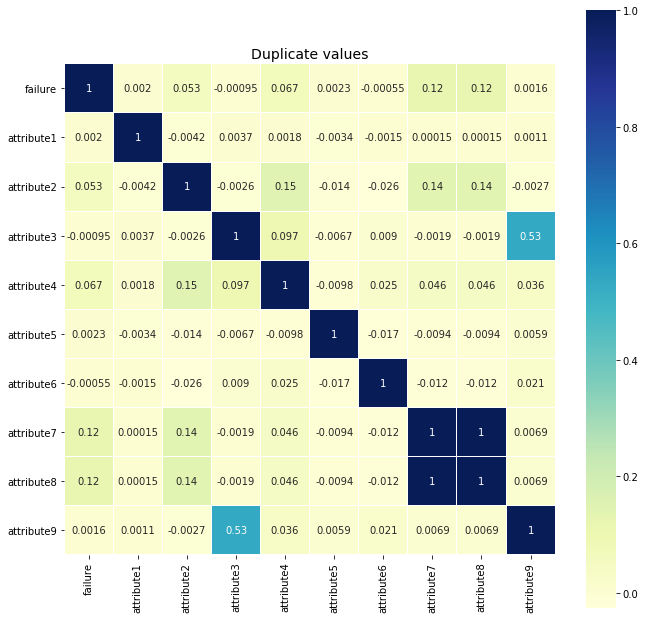

In [9]:
plt.figure(figsize=(11,11))
plt.title("Duplicate values", size = 14)
sns.heatmap(data.corr(), annot=True, linewidths = .01, square = True, cmap = "YlGnBu")
#sns.heatmap(data.corr(), annot=True, fmt = ".1f", linewidths = .5, square = True, cmap = "Blues_r")

# Attribute8 is removed from the dataset since it is the duplicate of attibute7.

In [10]:
del data['attribute8']
data.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3


# 4. Same device is used multiple times. A DataFrame is created which has the count of all the devices, so this information can be used later when the data in consolidated

In [11]:
data[data['device'] == 'Z1F0QLC1'].head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
1076,2015-01-01,Z1F0QLC1,0,71350416,0,0,0,7,198020,0,0
2239,2015-01-02,Z1F0QLC1,0,90497888,0,0,0,7,199378,0,0
3402,2015-01-03,Z1F0QLC1,0,109075808,0,0,0,7,200777,0,0
4564,2015-01-04,Z1F0QLC1,0,138358848,0,0,0,7,202115,0,0
5725,2015-01-05,Z1F0QLC1,0,163297864,0,0,0,7,203438,0,0


# A new DataFrame is created that has device count and then the column is renamed

In [12]:
data_device_count = pd.DataFrame(data.groupby('device')['device'].count())
data_device_count.head()

,device
device,
S1F01085,6
S1F013BB,6
S1F0166B,6
S1F01E6Y,48
S1F01JE0,6


In [13]:
data_device_count.rename(columns={'device':'device_count'}, inplace = True) # rename to device count
data_device_count.head()

,device_count
device,
S1F01085,6
S1F013BB,6
S1F0166B,6
S1F01E6Y,48
S1F01JE0,6


# 5. Groupby

In [14]:
data.nunique()

date             304
device          1168
failure            2
attribute1    123878
attribute2       558
attribute3        47
attribute4       115
attribute5        60
attribute6     44838
attribute7        28
attribute9        65
dtype: int64

# There are different ways to groupby. There are 124,494 rows, doing Groupby on date will bring down the dataset to 304. And doing groupby on device will bring down the dataset to 1,168 unique values. Groupby is done on the device, because doing groupby on date will make the dataset too small. Doing groupby on devices will consolidate the date into 1,168 rows which is a better number than date for training. If the dataset is done on device, then it can be analyzed how many times a device was used and not too much information is lost.

In [15]:
new_data = data.groupby('device').max()
new_data.head()

,date,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
device,,,,,,,,,,
S1F01085,2015-01-06,0,215630672,56,0,52,6,409404,0,7
S1F013BB,2015-05-11,0,243346080,0,0,0,5,689161,0,0
S1F0166B,2015-01-06,0,224339296,0,3,0,6,404786,0,0
S1F01E6Y,2015-02-17,0,240257968,0,0,0,12,259491,0,0
S1F01JE0,2015-01-06,0,235562856,0,0,0,6,412151,0,0


# DataFrame that was created earlier for device count will be joined together with the groupby DataFrame, so there is a total count that device was used. Count can also be done with groupby, but doing count through groupby will give the count for all the features, which will increase the number of features that are not needed, so a separate DataFrame of device count is created and then joined together with the groupby DataFrame.

In [16]:
new_data = new_data.join(data_device_count, on ='device')
new_data.head()

,date,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,device_count
device,,,,,,,,,,,
S1F01085,2015-01-06,0,215630672,56,0,52,6,409404,0,7,6
S1F013BB,2015-05-11,0,243346080,0,0,0,5,689161,0,0,6
S1F0166B,2015-01-06,0,224339296,0,3,0,6,404786,0,0,6
S1F01E6Y,2015-02-17,0,240257968,0,0,0,12,259491,0,0,48
S1F01JE0,2015-01-06,0,235562856,0,0,0,6,412151,0,0,6


# 6. Date in this DataFrame appears as a string. Month is extracted from that date column. 

# Datetime module can be used to extract other features from the date column, but for this project lambda is used to simply extract month since all the dates are for the same year. 

In [17]:
new_data.date = list(map(lambda x:x[5:7], new_data.date ))
new_data.head()

,date,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,device_count
device,,,,,,,,,,,
S1F01085,01,0,215630672,56,0,52,6,409404,0,7,6
S1F013BB,05,0,243346080,0,0,0,5,689161,0,0,6
S1F0166B,01,0,224339296,0,3,0,6,404786,0,0,6
S1F01E6Y,02,0,240257968,0,0,0,12,259491,0,0,48
S1F01JE0,01,0,235562856,0,0,0,6,412151,0,0,6


# Date column is renamed to month.

In [18]:
new_data.rename(columns={'date':'month'}, inplace = True)
new_data.head()

,month,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,device_count
device,,,,,,,,,,,
S1F01085,01,0,215630672,56,0,52,6,409404,0,7,6
S1F013BB,05,0,243346080,0,0,0,5,689161,0,0,6
S1F0166B,01,0,224339296,0,3,0,6,404786,0,0,6
S1F01E6Y,02,0,240257968,0,0,0,12,259491,0,0,48
S1F01JE0,01,0,235562856,0,0,0,6,412151,0,0,6


In [19]:
new_data.device_count.max()

304

# Below are all the devices that were used 304 times, so these devices were not only used in the month of November, but these devices were also used in other months.

In [20]:
new_data[new_data.device_count == 304].head()

,month,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,device_count
device,,,,,,,,,,,
S1F0E9EP,11,0,242890792,0,0,12,11,353337,0,0,304
S1F0EGMT,11,0,244129416,0,0,13,11,347165,32,0,304
S1F0FGBQ,11,0,243458728,0,0,0,12,309988,0,0,304
S1F0FP0C,11,0,243651936,0,0,0,12,356892,0,0,304
S1F0GCED,11,0,240061656,64792,0,7,11,341541,0,0,304


In [21]:
new_data.nunique()

month             11
failure            2
attribute1      1168
attribute2       118
attribute3        44
attribute4        67
attribute5        58
attribute6      1134
attribute7        23
attribute9        63
device_count     139
dtype: int64

# 7. Visualizing failure

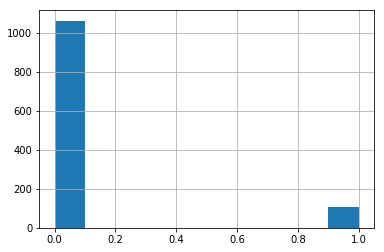

In [22]:
new_data.failure.hist()

In [23]:
print(new_data.failure[new_data.failure == 0].count())
print(new_data.failure[new_data.failure == 1].count())

1062
106


# The above histogram and value counts above show that more devices have a value of 0 and fewer devices have a value of 1. What that means is that more devices never failed and only a handful of devices failed. This dataset is highly imbalanced because 90% of the devices have a value of 0 and only 10% have a value of 1. This will make it hard to train a good model because on a dataset like this model will get trained to mostly predict 0, which is that the device never fails and the model will have a strong bias towards 0.

# One of the sampling techniques (Random Under-sampling, Random Over-sampling, SMOTE (Synthetic Minority Over-sampling Technique), or ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning)) can be used to balance the data, so 0 and 1 have the same ratio in the dataset. Only one sampling technique has to be used to balance the imbalanced dataset. But the aforementioned and other sampling techniques can be used to compare results and performance. Under and Over-sampling can be used to create a hybrid sampling technique.

# 8. Creating a model - All the features are assigned to x and failure the target variable is assigned to y.

In [24]:
y = new_data['failure']
del new_data['failure']
x = new_data

# 9. Train Test Split

In [25]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2,random_state = 0)

# Testing dataset is not over-sampled, because once the model has been trained on the balanced dataset, it will be evaluated on testing dataset which has imbalanced dataset, doing so allows to examine how well the trained model will do on an imbalanced dataset.

In [26]:
print(y_test[y_test==1].count())
print(y_test[y_test==0].count())

20
214


# 10. Using ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning) to balance the imbalanced dataset. ADASYN is built on top of SMOTE (Synthetic Minority Over-sampling Technique). SMOTE calculates the distance of two 2 data points of the minority class. The distance of these data points is multiplied by a random number between 0 and 1 to create a synthetic data point. Synthetic data points and the existing data points are used to create more synthetic data points until minority class has the same representation as the majority class.  

# ADASYN differs from SMOTE in terms of putting weight on minority classes that are hard to learn to train the model. More synthetic data points are generated for minority class data points that are hard for the model to learn from and creating more synthetic data points that otherwise would be hard to learn allows that model to learn from these data points that are minority in the minority class.

In [27]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=0, n_neighbors = 3)
x_resampled_train, y_resampled_train = ada.fit_sample(x_train, y_train)

# Training dataset below has equal representation both for 0 and 1 after over-sampling.

In [29]:
print((y_resampled_train==0).sum())
print((y_resampled_train==1).sum())

848
863


# Below scatterplots show what the data points look like before and after over-sampling. Red dots represent failed devices and green dots represent un-failed or working devices.   

# Plot 1 shows what the original data looks like which has red dots representing failed devices and green dots which represent working devices. It is evident that there are more green data points than red data points.   

# Plot 2 shows what the data looks like after ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning) has been applied on the training dataset. Over-sampling is done on the red dots which are the failed devices. Failed devices in plot 2 has more data points that’s because ADASYN created synthetic data points increasing data points for failed devices. And during this process green dots (working or un-failed devices) stay the same. 

# Scatterplots for different attributes were plotted to compare SMOTE and ADASYN, but the scatterplots almost always looked identical. One big reason why scatterplots for ADASYN are almost identical to SMOTE is because ADASYN is built on the foundation of SMOTE. Slight change in the scatterplots and the data points for SMOTE and ADASYN is because ADASYN puts more weight on data points that are minority in the minority class.

In [30]:
x_1 = x[y==1]
x_0 = x[y==0]
x_1_res = x_resampled_train[y_resampled_train == 1]
x_0_res = x_resampled_train[y_resampled_train == 0]

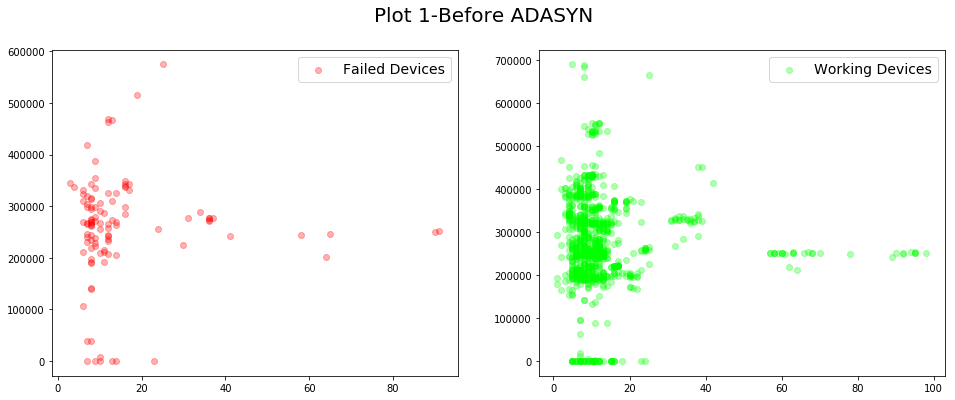

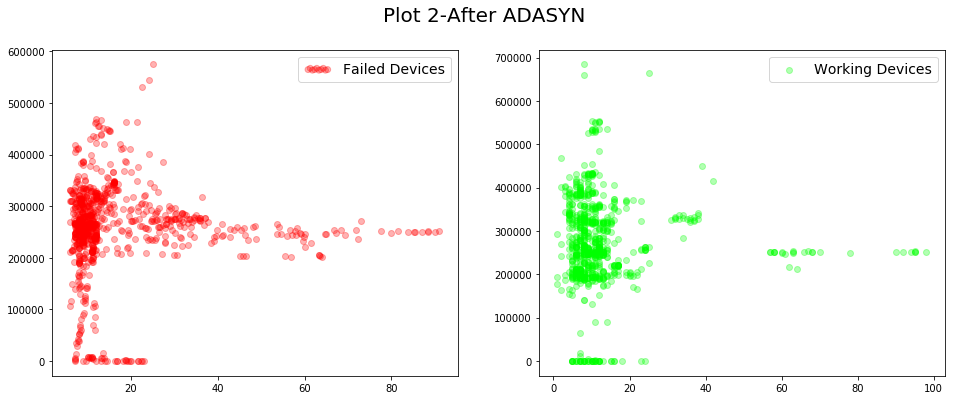

In [31]:
plt.figure(figsize=(16,6)).suptitle("Plot 1-Before ADASYN", fontsize=20)
plt.subplot(1,2,1).scatter((x_1).iloc[:,5].values, (x_1).iloc[:,6].values, color="red", alpha = 0.3)
plt.legend(('Failed Devices',), scatterpoints =1,fontsize=14, loc = "upper right")
plt.subplot(1,2,2).scatter((x_0).iloc[:,5].values, (x_0).iloc[:,6].values, color="lime",alpha = 0.3)
plt.legend(('Working Devices',), scatterpoints =1,fontsize=14, loc = "upper right")

plt.figure(figsize=(16,6)).suptitle("Plot 2-After ADASYN", fontsize=20)
plt.subplot(1,2,1).scatter((x_1_res)[:,5], (x_1_res)[:,6], color="red",alpha = 0.3)
plt.legend(('Failed Devices',), scatterpoints =10,fontsize=14, loc = "upper right")
plt.subplot(1,2,2).scatter((x_0_res)[:,5], (x_0_res)[:,6], color="lime",alpha = 0.3)
plt.legend(('Working Devices',), scatterpoints =1,fontsize=14, loc = "upper right")

# 11. Import Algorithm

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

In [33]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
lr = LogisticRegression()
kn = KNeighborsClassifier(n_neighbors = 3)

vote = VotingClassifier(estimators = [('d1', dt),('r1', rf),('g1',gb)], weights=[1,2,2])

# 12. Fit the data

In [34]:
dtr = dt.fit(x_resampled_train, y_resampled_train)
rfr = rf.fit(x_resampled_train, y_resampled_train)
gbr = gb.fit(x_resampled_train, y_resampled_train)
lrr = lr.fit(x_resampled_train, y_resampled_train)
knn = kn.fit(x_resampled_train, y_resampled_train)

votec = vote.fit(x_resampled_train, y_resampled_train)

# 13. Print Matrices

In [35]:
print("Decision Tree training score", dtr.score(x_resampled_train, y_resampled_train))
print("Random Forest training score", rfr.score(x_resampled_train, y_resampled_train))
print("Gradient Boosting training score", gbr.score(x_resampled_train, y_resampled_train))
print("Logistic Regression training score", lrr.score(x_resampled_train, y_resampled_train))
print("KNeighbors training score", knn.score(x_resampled_train, y_resampled_train))

print("Voting Classifier training score", votec.score(x_resampled_train, y_resampled_train))

Decision Tree training score 1.0
Random Forest training score 0.9976621858562245
Gradient Boosting training score 0.994155464640561
Logistic Regression training score 0.5902980713033313
KNeighbors training score 0.8836937463471654
Voting Classifier training score 0.9994155464640561


C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [36]:
print("Decision Tree test score", dtr.score(x_test, y_test))
print("Random Forest test score", rfr.score(x_test, y_test))
print("Gradient Boosting test score", gbr.score(x_test, y_test))
print("Logistic Regression test score", lrr.score(x_test, y_test))
print("KNeighbors test score", knn.score(x_test, y_test))

print("Voting Classifier test score", votec.score(x_test, y_test))

Decision Tree test score 0.9102564102564102
Random Forest test score 0.9487179487179487
Gradient Boosting test score 0.9700854700854701
Logistic Regression test score 0.6068376068376068
KNeighbors test score 0.688034188034188
Voting Classifier test score 0.9615384615384616


C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# y_test shown below is the original testing data set that was not over-sampled and has imbalanced classes for 0 and 1. There are 214 un-failed devices and only 20 failed devices.

In [37]:
print(y_test[y_test==1].count())
print(y_test[y_test==0].count())

20
214


# 14. Accuracy score will examine how well the model would do if the classes are imbalanced

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
d_predict = dt.predict(x_test)
r_predict = rf.predict(x_test)
g_predict = gb.predict(x_test)
l_predict = lr.predict(x_test)
k_predict = kn.predict(x_test)

v_predict = vote.predict(x_test)

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [40]:
print("Decision tree:", accuracy_score(y_test, d_predict))
print("Random Forest:", accuracy_score(y_test, r_predict))
print("Gradient Boosting:", accuracy_score(y_test, g_predict))
print("Logistic Regression:", accuracy_score(y_test, l_predict))
print("KNeighbors:", accuracy_score(y_test, k_predict))

print("Voting Classifier:", accuracy_score(y_test, v_predict))

Decision tree: 0.9102564102564102
Random Forest: 0.9487179487179487
Gradient Boosting: 0.9700854700854701
Logistic Regression: 0.6068376068376068
KNeighbors: 0.688034188034188
Voting Classifier: 0.9615384615384616


# Decision tree, Random Forest, Gradient Boosting, and Voting Classifier performed really well. These models were able to achieve over 90% accuracy even when the testing dataset is imbalanced.

# 15. Precision and Recall - Precision and recall is related to confusion matrix(type I and type II error).
# Precision is relevant items divided by total items. Precision calculates how many times was something correctly labelled or mislabelled.
# Recall is the relevant items divided by relevant. Recall calculates how many times was the correctly labelled item missed.

In [41]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [42]:
print("Precision for Decision tree:", precision_score(y_test, d_predict))
print("Recall for Decision tree:", recall_score(y_test, d_predict))
print("\nPrecision for Random Forest:", precision_score(y_test, r_predict))
print("Recall for Random Forest:", recall_score(y_test, r_predict))
print("\nPrecision for Gradient Boosting:", precision_score(y_test, g_predict))
print("Recall for Gradient Boosting:", recall_score(y_test, g_predict))
print("\nPrecision for Logistic Regression:", precision_score(y_test, l_predict))
print("Recall for Logistic Regression:", recall_score(y_test, l_predict))
print("\nPrecision for KNeighbors:", precision_score(y_test, k_predict))
print("Recall for KNeighbors:", recall_score(y_test, k_predict))

print("\nPrecision for Voting Classifier:", precision_score(y_test, v_predict))
print("Recall for Voting Classifier:", recall_score(y_test, v_predict))

Precision for Decision tree: 0.48
Recall for Decision tree: 0.6

Precision for Random Forest: 0.7
Recall for Random Forest: 0.7

Precision for Gradient Boosting: 0.8421052631578947
Recall for Gradient Boosting: 0.8

Precision for Logistic Regression: 0.10869565217391304
Recall for Logistic Regression: 0.5

Precision for KNeighbors: 0.06557377049180328
Recall for KNeighbors: 0.2

Precision for Voting Classifier: 0.7894736842105263
Recall for Voting Classifier: 0.75


# Precision doesn't look at how many times was the correctly labelled item missed. And recall disregards how many items were incorrectly labelled, which is why a model can have high precision, but low recall, or low recall and high precision. Depending on the domain, business objective and project precision might be preferred over recall and vice versa. But if the goal is to make the best model and there is no emphasis on precision and recall, F1 score can be used. F1 score can be calculated by the following equation: 2*(product of precision and recall) divided by (sum of precision and recall).

# Classification report - F1 score can be manually calculated, but classification report can get the F1 score without having to calculate it manually. Classification report also shows precision, recall, which can replace the precision and recall scores calculated above.

# Precision, recall and accuracy score for Logistic Regression and KNeighbors are low which is why they are not used for classification report.

In [43]:
from sklearn.metrics import classification_report

print("Decision Tree:\n",classification_report(y_test, d_predict))
print("\nRandom Forest:\n",classification_report(y_test, r_predict))
print("\nGradient Boostingn:\n",classification_report(y_test, g_predict))
print("\nVoting Classifier:\n",classification_report(y_test, v_predict))

Decision Tree:
              precision    recall  f1-score   support

          0       0.96      0.94      0.95       214
          1       0.48      0.60      0.53        20

avg / total       0.92      0.91      0.91       234


Random Forest:
              precision    recall  f1-score   support

          0       0.97      0.97      0.97       214
          1       0.70      0.70      0.70        20

avg / total       0.95      0.95      0.95       234


Gradient Boostingn:
              precision    recall  f1-score   support

          0       0.98      0.99      0.98       214
          1       0.84      0.80      0.82        20

avg / total       0.97      0.97      0.97       234


Voting Classifier:
              precision    recall  f1-score   support

          0       0.98      0.98      0.98       214
          1       0.79      0.75      0.77        20

avg / total       0.96      0.96      0.96       234



# The above classification report gives scores for precision, recall, and f1. And these scores will change when the model is trained and tested again. But looking at the above scores, gradient boosting would be a good model to use on unknown dataset because gradient boosting can identify minority class better than other models and has higher f1 score for minority class.

# Cross Validation scores are not computed for over-sampling because the over-sampling was only done on the training dataset and running cross validation will show higher f1 scores which are misleading. And x_test and y_test cannot be used in cross validation because there is imbalanced dataset, that will give lower f1 score.

# 16. Feature Importance

attribute4      0.470661
device_count    0.190457
attribute2      0.086452
attribute6      0.068378
month           0.065187
attribute7      0.048408
attribute1      0.029126
attribute5      0.028477
attribute3      0.012853
attribute9      0.000000
dtype: float64


Text(0.5,1,'Feature Importance')

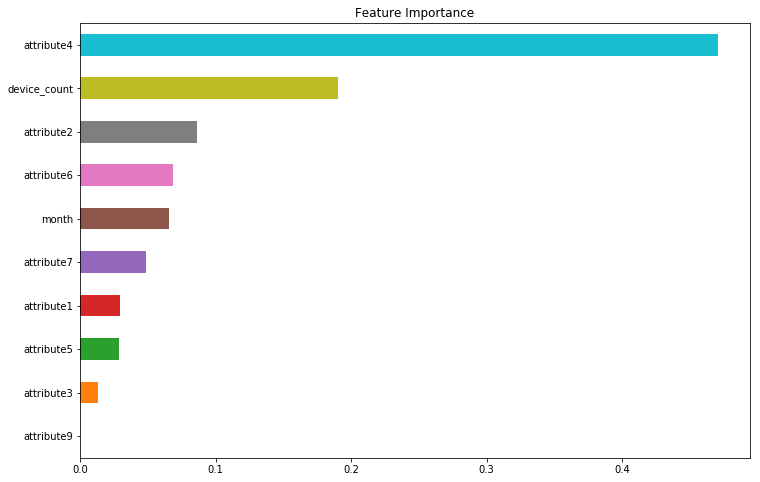

In [44]:
feature_importances_dt = pd.Series(dt.feature_importances_, index = x.columns).sort_values (ascending = False)
print(feature_importances_dt)

plt.figure(figsize=(12,8))
feature_importances_dt.sort_values(ascending = True).tail(20).plot(kind='barh')
plt.title("Feature Importance")

attribute4      0.340730
attribute2      0.161938
device_count    0.135888
month           0.102961
attribute7      0.090058
attribute1      0.053090
attribute5      0.046408
attribute6      0.044400
attribute9      0.016877
attribute3      0.007649
dtype: float64


Text(0.5,1,'Feature Importance')

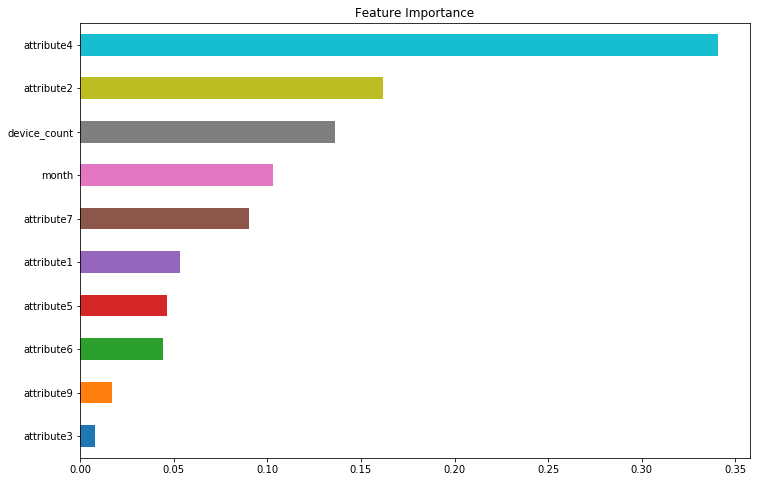

In [45]:
feature_importances_rf = pd.Series(rf.feature_importances_, index = x.columns).sort_values (ascending = False)
print(feature_importances_rf)

plt.figure(figsize=(12,8))
feature_importances_rf.sort_values(ascending = True).tail(20).plot(kind='barh')
plt.title("Feature Importance")

device_count    0.243949
month           0.200890
attribute4      0.111568
attribute6      0.103368
attribute2      0.088016
attribute7      0.075309
attribute5      0.070804
attribute1      0.061060
attribute9      0.031416
attribute3      0.013620
dtype: float64


Text(0.5,1,'Feature Importance')

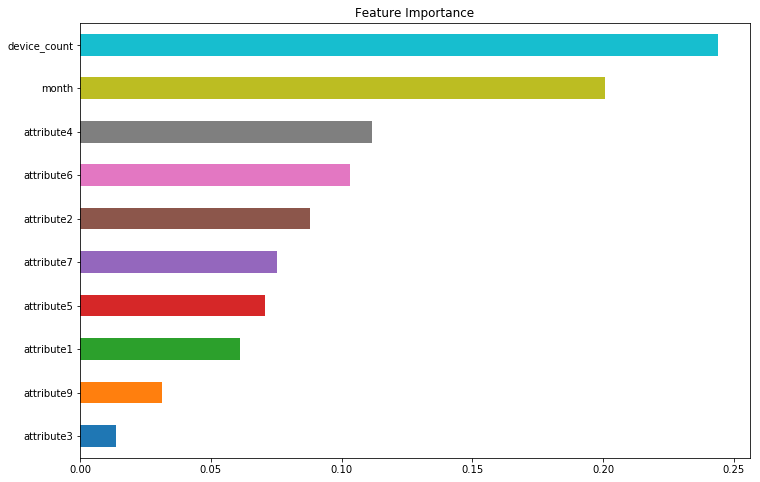

In [46]:
feature_importances_gb = pd.Series(gb.feature_importances_, index = x.columns).sort_values (ascending = False)
print(feature_importances_gb)

plt.figure(figsize=(12,8))
feature_importances_gb.sort_values(ascending = True).tail(20).plot(kind='barh')
plt.title("Feature Importance")

## Concluding words: In 8 out of 12 models, device count, a feature engineered attribute was the most important feature at predicting device failure. That means a device that is being used the most has higher likelihood of failing. Decision Tree and Gradient Boosting mostly always have the same top 3 features for all of the sampling techniques. Random Forest does not consistently reproduce the same important features and that’s because all sampling Techniques have some randomness in them.  
## Random Under-sampling randomly reduces the data points of the majority class.  
## Random Over-Sampling randomly creates copies of the existing data points and increases weights. Not all data points get a copy and data points randomly get different weight. 
## SMOTE (Synthetic Minority Over-sampling Technique) multiplies the distance of two points with a random number between 0 and 1 to create synthetic data points. 
## ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning) is built on the foundation of SMOTE to create synthetic data points, but it puts more weight on the minority data points, so data points that are minority in minority class can have more weight during training. 
## Because of the randomness that all of the sampling techniques have, different data points are created each time and when the model is trained on different data points, it produces different important features for Random Forest. Gradient Boosting and Decision Tree are consistent at producing same top three important features. However, other features for Gradient Boosting and Decision Tree also change and that’s because of the same randomness in the data points that change what the model learns each time. 
## All of the samplings were done after train test split, so sampling was only done on the training dataset. Sampling techniques and trained models were then evaluated on the original testing dataset which has imbalanced class. 
## In order to determine which sampling technique performed better, f1-scores of only minority class (failed devices) are evaluated because it’s easy for models to classify majority class (working/failed devices) that have 90% representation. Random Under-sampling have low f1 scores for minority class when compared with over-sampling. All 4 models for under-sampling have f1-scores that are below 0.70 for minority class (1.0 is the highest possible). On a real world imbalanced dataset, this random under-sampling would likely get an f1 score of about 0.70, unless hyper-parameter optimization is done, which could improve the score by 5 to 10 percent.  
## All of the over-sampling techniques performed better at identifying minority class because models were trained on a bigger dataset and there is no loss of information, so it performs better on the imbalanced testing dataset. Of all the models, Gradient Boosting was able to get the highest f1-score of 0.79, 0.85, and 0.82 with random over-sampling, SMOTE, and ADASYN respectively for minority class. Voting classifier was used with random forest, gradient boosting, and decision tree and weights were assigned to them, which produced the f1-score of 0.72, 0.80, and 0.77 for random over-sampling, SMOTE, and ADASYN respectively. Logistic Regression and KNeighbors were used initially, but because of the low scores, they weren’t used any further. Instead of using 5 neighbors, 3 neighbors were used to oversample data points for SMOTE and ADASYN, which improved f1-scores. Other under-sampling techniques would have to be used to determine if over-sampling is better than under-sampling. 
## Ensembling, bagging and boosting can further improve the scores and make the model better. Parameter tuning with grid search can further improve the model so minority class can be classified with higher precision and recall. And then feature importance can be run to examine if the models can reproduce important feature consistently. There are sampling techniques that combine under and over-sampling. SMOTEENN and SMOTETomek, where SMOTE is used to over-sample data points. ENN (Edited Nearest Neighbors) and Tomek link are used for under-sampling. SMOTEENN and SMOTETomek also produced results that are comparable with SMOTE. However, I have not done enough research on these combined sampling techniques to properly compare them with over and under-sampling. 
## Some ideas that can make the model better would be to turn some of the attributes and features into object or categorical. Especially features that have less than 100 unique values because it’s likely that those features are truly categorical. Attributes that have unique values in hundreds and thousands can be kept as integer. Once some attributes have been turned into object or categorical, interactions can be created by multiplying all object features with integer features and performance can be compared with these models.

## [Random Under-sampling](https://github.com/mohammadbutt/5th-Project-Predicting-Device-Failure/blob/master/Predicting%20Device%20Failure-Random%20Under%20Sampling.ipynb)
## [Random Over-sampling](https://github.com/mohammadbutt/5th-Project-Predicting-Device-Failure/blob/master/Predicting%20Device%20Failure-Random%20Over%20Sampling.ipynb)
## [SMOTE (Synthetic Minority Over-sampling Technique)](https://github.com/mohammadbutt/5th-Project-Predicting-Device-Failure/blob/master/Predicting%20Device%20Failure-SMOTE.ipynb)